In [39]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

In [40]:
df = pd.read_csv('survey lung cancer.csv')

In [41]:
df

,GENDER,AGE,S12OKING,YELLOW_11INGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,11ATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSU12ING,COUGHING,SHORTNESS O11 BREATH,SWALLOWING DI1111ICULTY,CHEST PAIN,LUNG_CANCER
0,12,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,12,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,11,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,12,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,11,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,11,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,12,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,12,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,12,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [42]:
df.columns

Index(['GENDER', 'AGE', 'S12OKING', 'YELLOW_11INGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', '11ATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSU12ING', 'COUGHING', 'SHORTNESS O11 BREATH',
       'SWALLOWING DI1111ICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [43]:
df.count()

GENDER                     309
AGE                        309
S12OKING                   309
YELLOW_11INGERS            309
ANXIETY                    309
PEER_PRESSURE              309
CHRONIC DISEASE            309
11ATIGUE                   309
ALLERGY                    309
WHEEZING                   309
ALCOHOL CONSU12ING         309
COUGHING                   309
SHORTNESS O11 BREATH       309
SWALLOWING DI1111ICULTY    309
CHEST PAIN                 309
LUNG_CANCER                309
dtype: int64

In [44]:
df.describe()

,GENDER,AGE,S12OKING,YELLOW_11INGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,11ATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSU12ING,COUGHING,SHORTNESS O11 BREATH,SWALLOWING DI1111ICULTY,CHEST PAIN,LUNG_CANCER
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,11.524272,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,0.873786
std,0.500221,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
min,11.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,12.000000,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,12.000000,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,12.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [45]:
df.dtypes

GENDER                     int64
AGE                        int64
S12OKING                   int64
YELLOW_11INGERS            int64
ANXIETY                    int64
PEER_PRESSURE              int64
CHRONIC DISEASE            int64
11ATIGUE                   int64
ALLERGY                    int64
WHEEZING                   int64
ALCOHOL CONSU12ING         int64
COUGHING                   int64
SHORTNESS O11 BREATH       int64
SWALLOWING DI1111ICULTY    int64
CHEST PAIN                 int64
LUNG_CANCER                int64
dtype: object

In [46]:
df.filter

<bound method NDFrame.filter of      GENDER  AGE  S12OKING  YELLOW_11INGERS  ANXIETY  PEER_PRESSURE  \
0        12   69         1                2        2              1   
1        12   74         2                1        1              1   
2        11   59         1                1        1              2   
3        12   63         2                2        2              1   
4        11   63         1                2        1              1   
..      ...  ...       ...              ...      ...            ...   
304      11   56         1                1        1              2   
305      12   70         2                1        1              1   
306      12   58         2                1        1              1   
307      12   67         2                1        2              1   
308      12   62         1                1        1              2   

     CHRONIC DISEASE  11ATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSU12ING  \
0                  1          2         

In [47]:
df.corr()

,GENDER,AGE,S12OKING,YELLOW_11INGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,11ATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSU12ING,COUGHING,SHORTNESS O11 BREATH,SWALLOWING DI1111ICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,0.021306,0.036277,-0.212959,-0.152127,-0.275564,-0.204606,-0.083560,0.154251,0.141207,0.454268,0.133303,-0.064911,-0.078161,0.362958,0.067254
AGE,0.021306,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104,0.089465
S12OKING,0.036277,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117,0.058179
YELLOW_11INGERS,-0.212959,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829,0.181339
ANXIETY,-0.152127,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634,0.144947
PEER_PRESSURE,-0.275564,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828,0.186388
CHRONIC DISEASE,-0.204606,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938,0.110891
11ATIGUE,-0.083560,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832,0.150673
ALLERGY,0.154251,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433,0.327766
WHEEZING,0.141207,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640,0.249300


In [48]:
df.kurtosis()

GENDER                    -2.003469
AGE                        1.746558
S12OKING                  -1.947261
YELLOW_11INGERS           -1.932789
ANXIETY                   -2.013029
PEER_PRESSURE             -2.013029
CHRONIC DISEASE           -2.012689
11ATIGUE                  -1.459167
ALLERGY                   -1.960235
WHEEZING                  -1.960235
ALCOHOL CONSU12ING        -1.960235
COUGHING                  -1.908203
SHORTNESS O11 BREATH      -1.663044
SWALLOWING DI1111ICULTY   -1.997643
CHEST PAIN                -1.960235
LUNG_CANCER                3.137414
dtype: float64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   GENDER                   309 non-null    int64
 1   AGE                      309 non-null    int64
 2   S12OKING                 309 non-null    int64
 3   YELLOW_11INGERS          309 non-null    int64
 4   ANXIETY                  309 non-null    int64
 5   PEER_PRESSURE            309 non-null    int64
 6   CHRONIC DISEASE          309 non-null    int64
 7   11ATIGUE                 309 non-null    int64
 8   ALLERGY                  309 non-null    int64
 9   WHEEZING                 309 non-null    int64
 10  ALCOHOL CONSU12ING       309 non-null    int64
 11  COUGHING                 309 non-null    int64
 12  SHORTNESS O11 BREATH     309 non-null    int64
 13  SWALLOWING DI1111ICULTY  309 non-null    int64
 14  CHEST PAIN               309 non-null    int64
 15  LUNG_C

In [50]:
df.shape

(309, 16)

In [51]:
df.isnull().sum()

GENDER                     0
AGE                        0
S12OKING                   0
YELLOW_11INGERS            0
ANXIETY                    0
PEER_PRESSURE              0
CHRONIC DISEASE            0
11ATIGUE                   0
ALLERGY                    0
WHEEZING                   0
ALCOHOL CONSU12ING         0
COUGHING                   0
SHORTNESS O11 BREATH       0
SWALLOWING DI1111ICULTY    0
CHEST PAIN                 0
LUNG_CANCER                0
dtype: int64

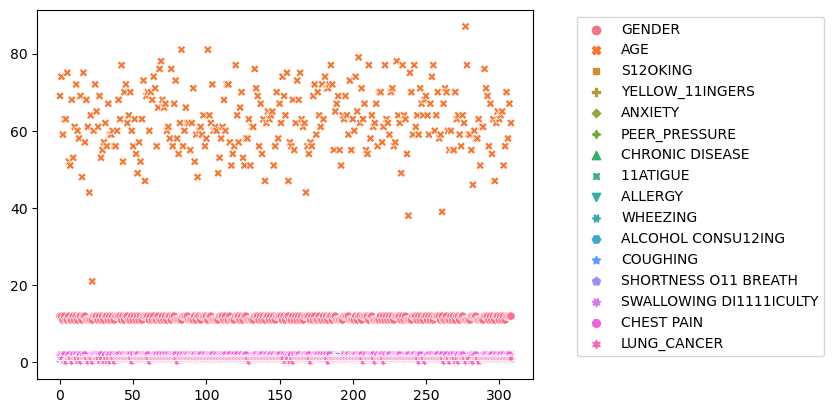

In [52]:
sns.move_legend(sns.scatterplot(df), "upper right", bbox_to_anchor=(1.6,1))

<Axes: >

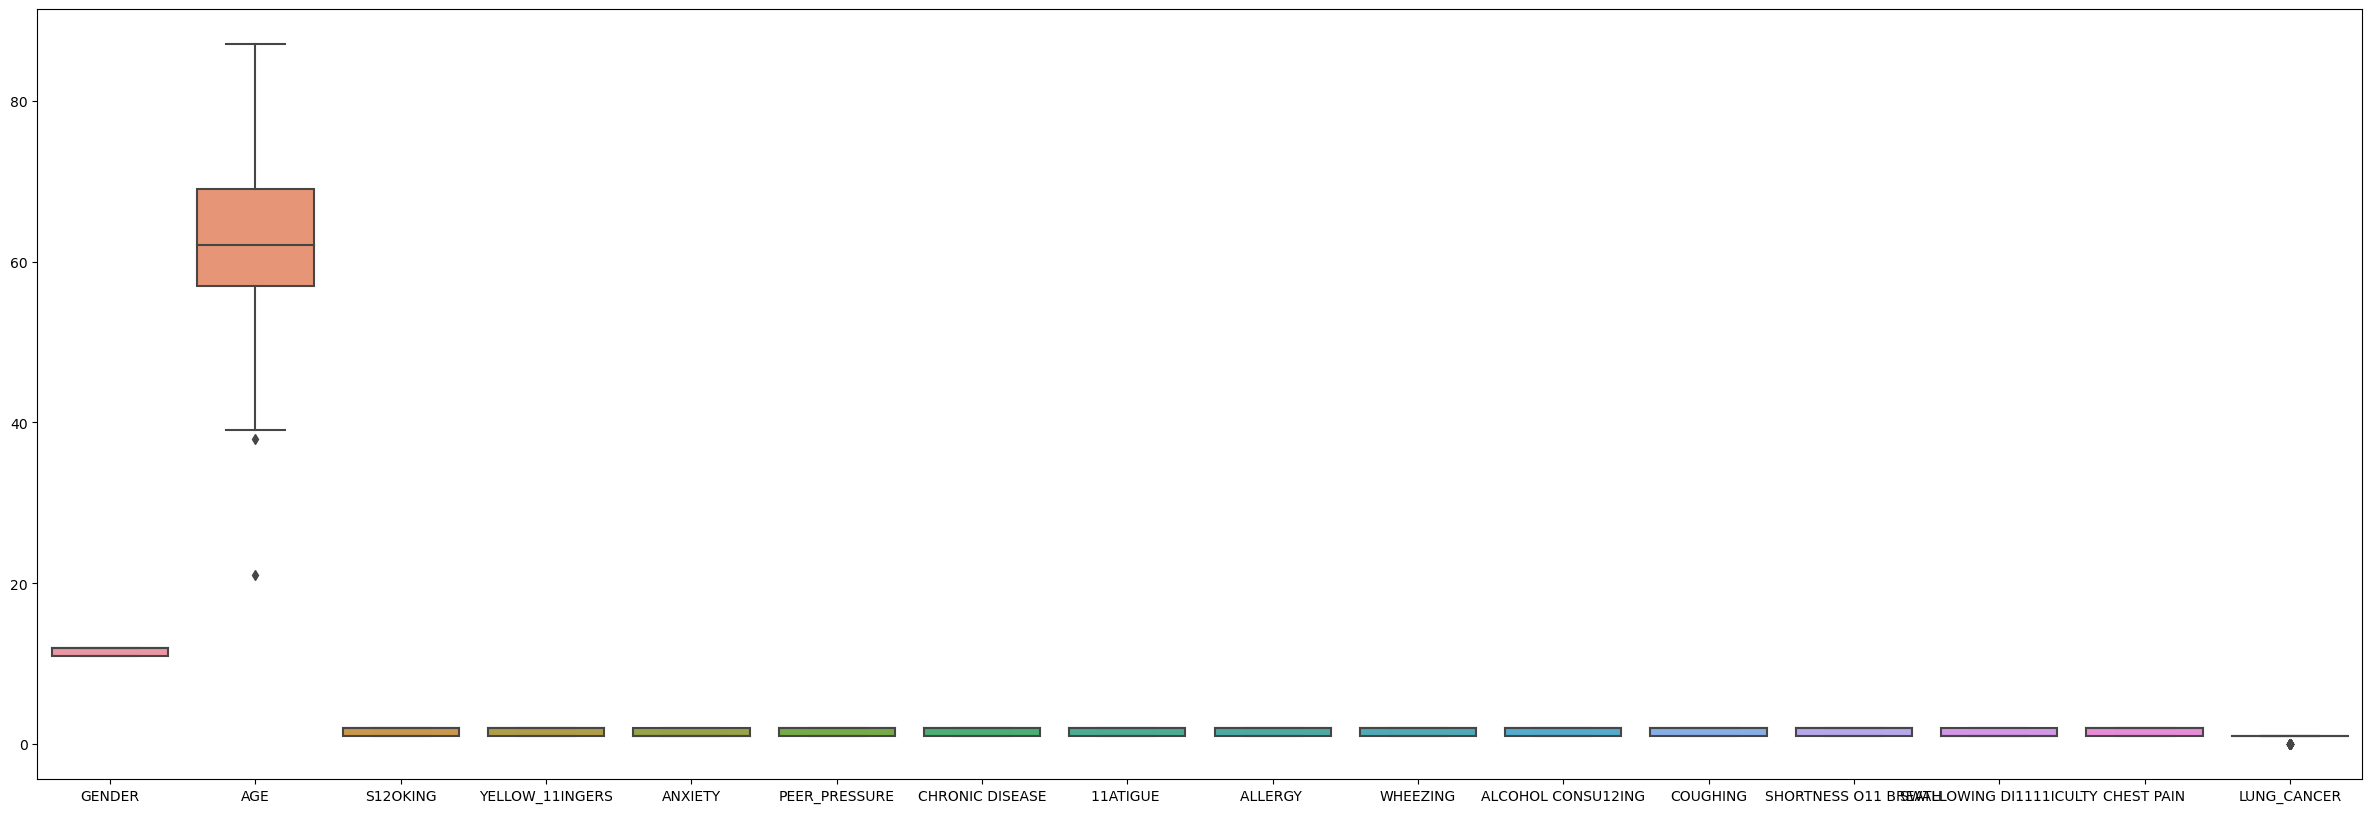

In [53]:
plt.figure(figsize=(30,10))
sns.boxplot(df)

<Axes: xlabel='ALCOHOL CONSU12ING', ylabel='AGE'>

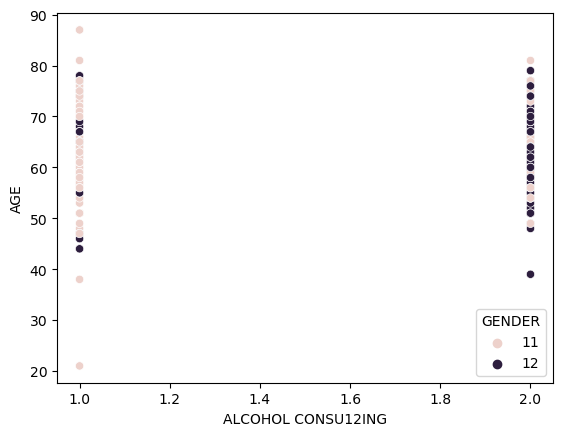

In [54]:
sns.scatterplot(x='ALCOHOL CONSU12ING', y='AGE', data=df, hue='GENDER')

C:\Users\aryan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 3000x1000 with 0 Axes>

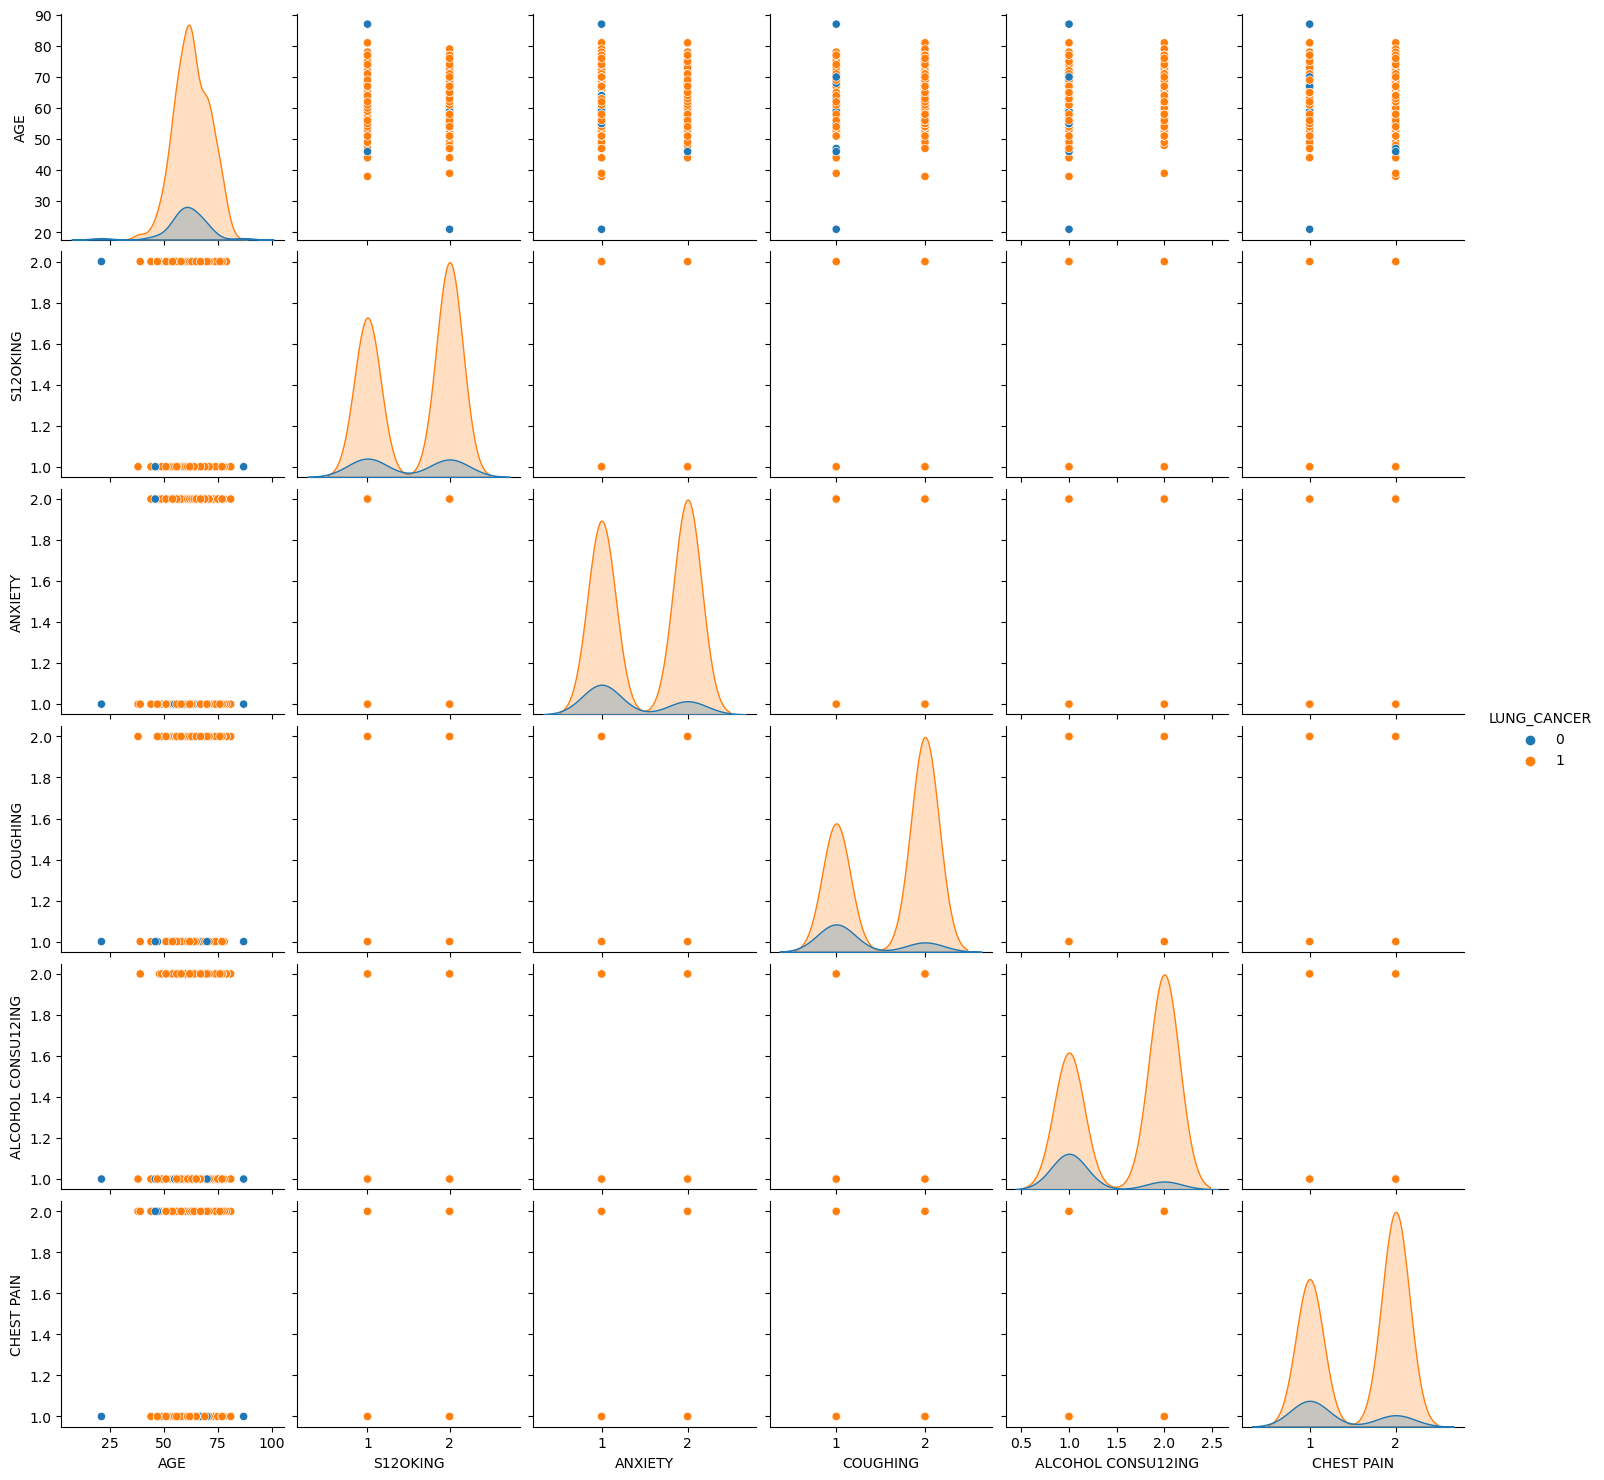

In [55]:
plt.figure(figsize=(30,10))
features = ['AGE', 'S12OKING', 'ANXIETY', 'COUGHING', 'ALCOHOL CONSU12ING', 'CHEST PAIN', 'LUNG_CANCER']
sns.pairplot(df[features], hue='LUNG_CANCER')

<Axes: >

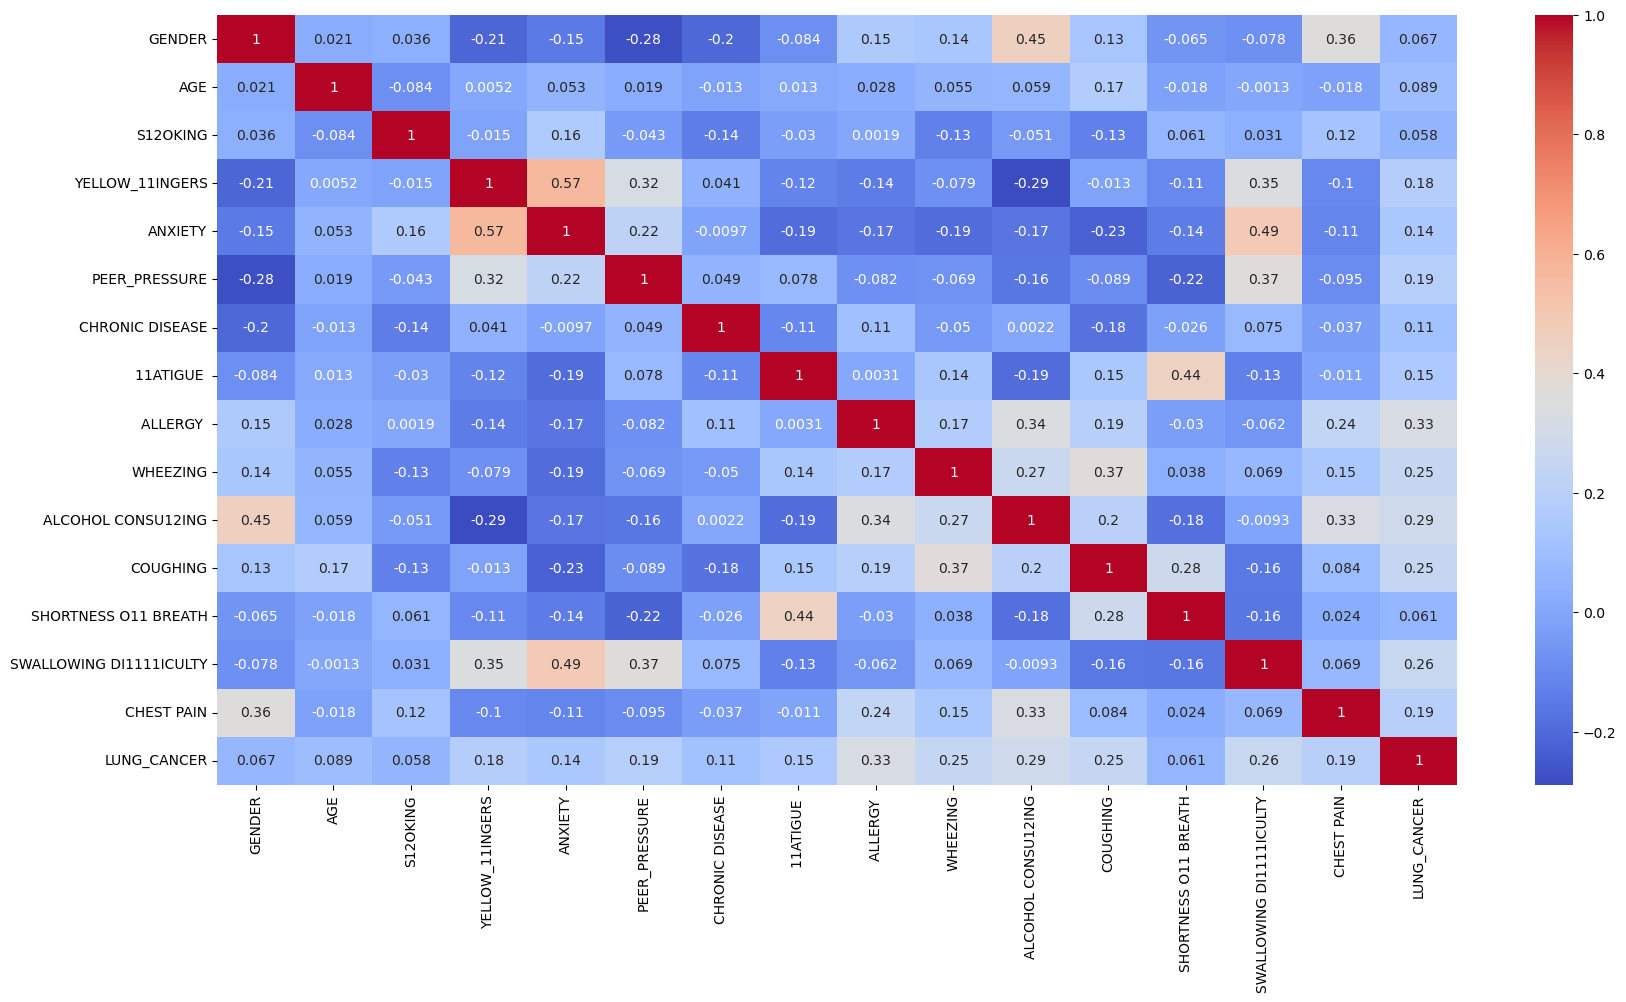

In [56]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [57]:
X = df.iloc[:, :15]
y = df.iloc[:, 15]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [58]:
knn = KNeighborsClassifier(n_neighbors=21)

In [59]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [60]:
y_pred = knn.predict(X_test)

In [61]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [62]:
accuracy_score(y_test, y_pred)

0.967741935483871

In [63]:
f1_score(y_test, y_pred)

0.9836065573770492

<Axes: xlabel='LUNG_CANCER', ylabel='Count'>

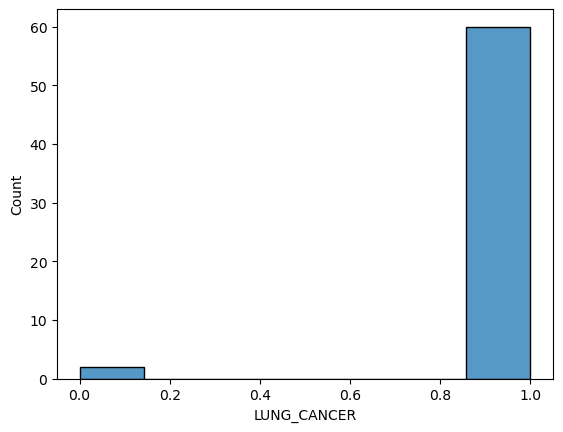

In [66]:
sns.histplot(y_test)

<Axes: xlabel='LUNG_CANCER', ylabel='Density'>

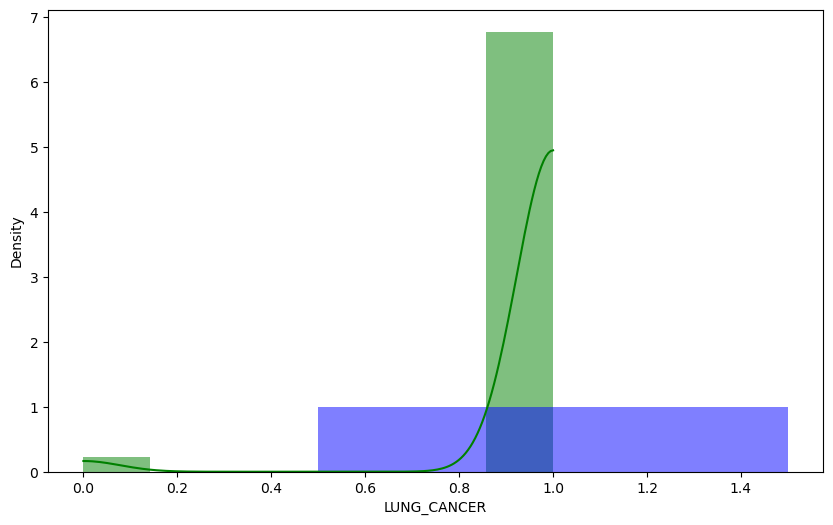

In [76]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='green', kde=True, stat="density", linewidth=0)
sns.histplot(y_pred, color='blue', kde=True, stat="density", linewidth=0)